###1.) Install Required Packages

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib
import matplotlib.pylab as plt
!pip install dmba
from dmba import regressionSummary, classificationSummary
from dmba import liftChart, gainsChart
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from dmba import adjusted_r2_score, AIC_score, BIC_score

### 2.) Data Preparation




Create a new data frame.  Remove the first four variables from the Airfares data and convert the appropriate variables into Dummy variables.  Show dataset information for shape, columns, and head.


In [ ]:
#loading the dataset

air=pd.read_csv("/content/Airfares_Test1.csv")
air.head(2)

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,1,Yes,5291.99,28637,21112,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,1,No,5419.16,26993,29838,3532657,7145897,Free,Free,576,8820,174.47


In [ ]:
#Creating a new data frame and Removing 4 variables
air_df = air.iloc[:,4:]
air_df.head()

,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,1.00,3,1,Yes,5291.99,28637,21112,3036732,205711,Free,Free,312,7864,64.11
1,1.06,3,1,No,5419.16,26993,29838,3532657,7145897,Free,Free,576,8820,174.47
2,1.06,3,1,No,9185.28,30124,29838,5787293,7145897,Free,Free,364,6452,207.76
3,1.06,3,1,Yes,2657.35,29260,29838,7830332,7145897,Controlled,Free,612,25144,85.47
4,1.06,3,1,Yes,2657.35,29260,29838,7830332,7145897,Free,Free,612,25144,85.47


In [ ]:
air_df.shape

(638, 14)

In [ ]:
air_df.columns

Index(['COUPON', 'NEW', 'VACATION', 'SW', 'HI', 'S_INCOME', 'E_INCOME',
       'S_POP', 'E_POP', 'SLOT', 'GATE', 'DISTANCE', 'PAX', 'FARE'],
      dtype='object')

In [ ]:
#Checking variable types
air_df.dtypes

COUPON      float64
NEW           int64
VACATION      int64
SW           object
HI          float64
S_INCOME      int64
E_INCOME      int64
S_POP         int64
E_POP         int64
SLOT         object
GATE         object
DISTANCE      int64
PAX           int64
FARE        float64
dtype: object

In [ ]:
#Converting object variables and variables stored in integers into category to create dummies

air_df[['VACATION','SW','SLOT','GATE']]= air_df[['VACATION','SW','SLOT','GATE']].astype('category')

In [ ]:
#converting appropriate variables into dummy
air_df = pd.get_dummies(air_df,prefix_sep="_",columns=['VACATION','SW','SLOT','GATE'],drop_first=True)


In [ ]:
air_df.shape

(638, 14)

In [ ]:
air_df.columns

Index(['COUPON', 'NEW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP',
       'DISTANCE', 'PAX', 'FARE', 'VACATION_5', 'SW_Yes', 'SLOT_Free',
       'GATE_Free'],
      dtype='object')

In [ ]:
air_df.head()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE,VACATION_5,SW_Yes,SLOT_Free,GATE_Free
0,1.00,3,5291.99,28637,21112,3036732,205711,312,7864,64.11,0,1,1,1
1,1.06,3,5419.16,26993,29838,3532657,7145897,576,8820,174.47,0,0,1,1
2,1.06,3,9185.28,30124,29838,5787293,7145897,364,6452,207.76,0,0,1,1
3,1.06,3,2657.35,29260,29838,7830332,7145897,612,25144,85.47,0,1,0,1
4,1.06,3,2657.35,29260,29838,7830332,7145897,612,25144,85.47,0,1,1,1


### 3.) Exploratory Data Analysis

Explore the relationships between all numeric variables including the outcome (FARE) by creating a 1) correlation table, 2) heat map and 3) scatterplot matrix.

In [ ]:
#1 Correlation Table
corr=air_df.corr()
corr

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE,VACATION_5,SW_Yes,SLOT_Free,GATE_Free
COUPON,1.000000,0.020223,-0.347252,-0.088403,0.046889,-0.107763,0.094970,0.746805,-0.336974,0.496537,0.071424,-0.188098,-0.021901,0.064369
NEW,0.020223,1.000000,0.054147,0.026597,0.113377,-0.016672,0.058568,0.080965,0.010495,0.091730,-0.047433,-0.081881,-0.058414,-0.013106
HI,-0.347252,0.054147,1.000000,-0.027382,0.082393,-0.172495,-0.062456,-0.312375,-0.168961,0.025195,-0.151625,-0.040172,0.185179,-0.155182
S_INCOME,-0.088403,0.026597,-0.027382,1.000000,-0.138864,0.517187,-0.272280,0.028153,0.138197,0.209135,-0.216393,-0.272269,-0.231868,-0.108193
E_INCOME,0.046889,0.113377,0.082393,-0.138864,1.000000,-0.144059,0.458418,0.176531,0.259961,0.326092,-0.076288,-0.281160,-0.197481,-0.062807
S_POP,-0.107763,-0.016672,-0.172495,0.517187,-0.144059,1.000000,-0.280143,0.018437,0.284611,0.145097,-0.208549,-0.089282,-0.281576,-0.085900
E_POP,0.094970,0.058568,-0.062456,-0.272280,0.458418,-0.280143,1.000000,0.115640,0.314698,0.285043,-0.167054,-0.221272,-0.246216,-0.149666
DISTANCE,0.746805,0.080965,-0.312375,0.028153,0.176531,0.018437,0.115640,1.000000,-0.102482,0.670016,0.093198,-0.240485,-0.009483,0.065218
PAX,-0.336974,0.010495,-0.168961,0.138197,0.259961,0.284611,0.314698,-0.102482,1.000000,-0.090705,-0.017747,-0.052468,-0.243143,-0.040288
FARE,0.496537,0.091730,0.025195,0.209135,0.326092,0.145097,0.285043,0.670016,-0.090705,1.000000,-0.276868,-0.543813,-0.209438,-0.208540


<Axes: >

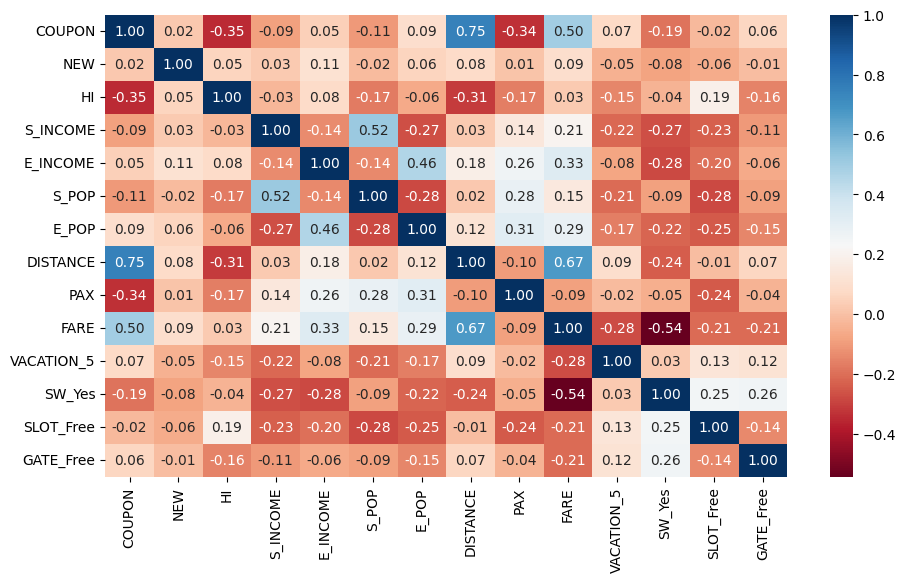

In [ ]:
#2 Heatmap
fig, ax = plt.subplots()
fig.set_size_inches(11,6)
sns.heatmap(corr, cmap='RdBu', annot=True, fmt='.2f')

In [ ]:
from pandas.plotting import scatter_matrix

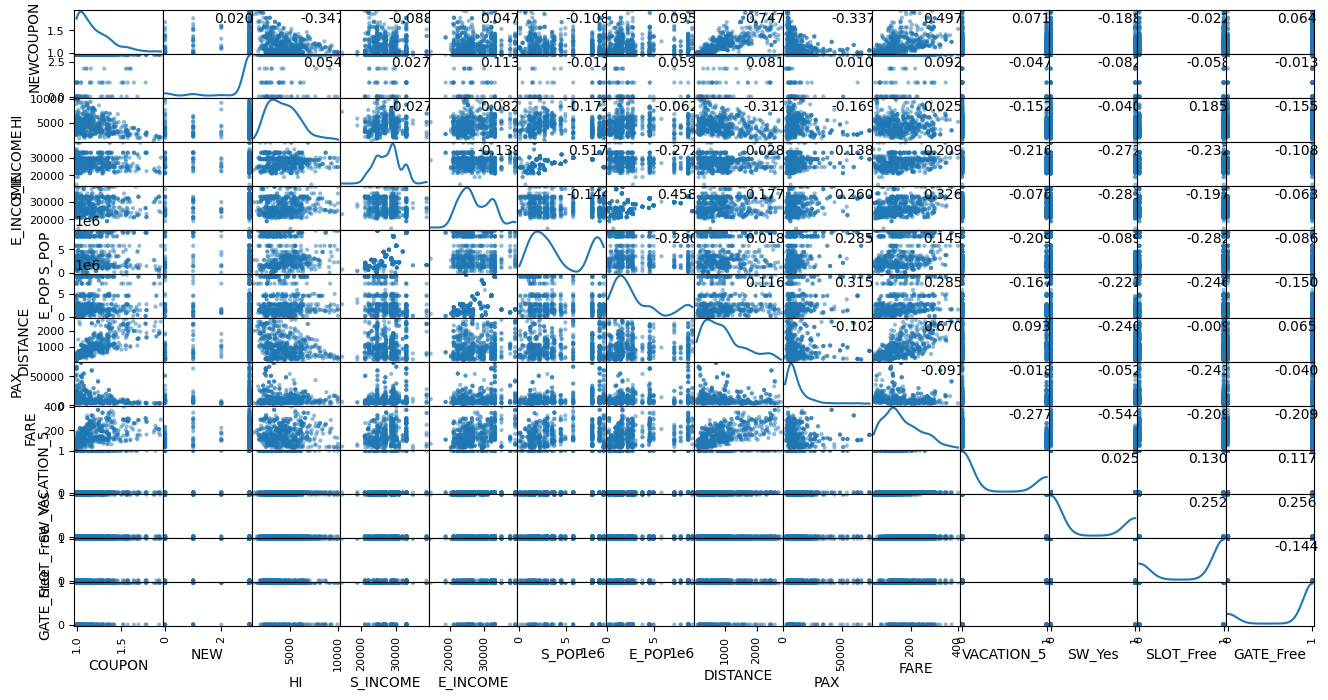

In [ ]:
#3 Scatterplot matrix

df = air_df
axes = scatter_matrix(df, alpha=0.5, figsize=(16, 8), diagonal='kde')
corr = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
  axes[i, j].annotate('%.3f' %corr[i,j], (0.8, 0.8),
                      xycoords='axes fraction', ha='center', va='center')
plt.show()

What seems to be the best single predictor of FARE and why?

 - The best single predictor of fare is DISTANCE since it has the highest correlation with FARE at 0.67

Which variable(s) are at least 70% correlated?  Of those pairs, which variable would you remove from your model and why?

 - DISTANCE and COUPON are the variables that are atleast 70% correlated
  
 - COUPON should be removed because compared to distance, coupon has lower correlation(0.50) with the outcome variable (FARE)

### 4.) Variable Reduction Techniques  

Conduct a PCA analysis.

In [ ]:
air_df.head(2)

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE,VACATION_5,SW_Yes,SLOT_Free,GATE_Free
0,1.00,3,5291.99,28637,21112,3036732,205711,312,7864,64.11,0,1,1,1
1,1.06,3,5419.16,26993,29838,3532657,7145897,576,8820,174.47,0,0,1,1


In [ ]:
#Remove the last 4 variables for they are categories, drop also records with missing values

air_clean =air_df.iloc[:,0:10].dropna(axis=0)
air_clean.head(2)

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
0,1.00,3,5291.99,28637,21112,3036732,205711,312,7864,64.11
1,1.06,3,5419.16,26993,29838,3532657,7145897,576,8820,174.47


In [ ]:
#Normalize before perform PCA
pcs = PCA()
pcs.fit(preprocessing.scale(air_clean))

pcsSummary_df = pd.DataFrame({'std_dev': np.sqrt(pcs.explained_variance_),
                              'propofvar': pcs.explained_variance_ratio_,
                              'cum_propvar': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1,len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
std_dev,1.6002,1.3762,1.2955,1.0976,0.9695,0.7240,0.6771,0.6195,0.4830,0.3723
propofvar,0.2557,0.1891,0.1676,0.1203,0.0938,0.0523,0.0458,0.0383,0.0233,0.0138
cum_propvar,0.2557,0.4448,0.6123,0.7326,0.8265,0.8788,0.9246,0.9629,0.9862,1.0000


At how many PC’s do you attain a cumulative proportion of over 70%? At how many PC’s do you attain a cumulative proportion of over 90%?

 - At PC4, we attain a cumulative proportion of 70%
 - At PC7, we attain a cumulative proportion of 90%

### 5.) Build Linear Regression Model

In [ ]:
air_df.head(2)

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE,VACATION_5,SW_Yes,SLOT_Free,GATE_Free
0,1.00,3,5291.99,28637,21112,3036732,205711,312,7864,64.11,0,1,1,1
1,1.06,3,5419.16,26993,29838,3532657,7145897,576,8820,174.47,0,0,1,1


Perform a full regression predicting the FARE using the data frame from SECTION 1.  Your train validation split should be 60/40.  Your random seed should be your student ID number.  Fit your model to the validation data and generate error statistics.

In [ ]:
excluded_columns = 'FARE'
predictors = [s for s in air_df.columns if s not in excluded_columns]

outcome = 'FARE'

In [ ]:
# partition data
X = air_df[predictors]
y = air_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=301323966)

In [ ]:
#Train the Model
air_lm = LinearRegression()
air_lm.fit(train_X, train_y)

LinearRegression()

In [ ]:
#Fit into validation data
air_lm_pred = air_lm.predict(valid_X)

In [ ]:
# Generate error statistics
regressionSummary(valid_y, air_lm_pred)


Regression statistics

                      Mean Error (ME) : -1.1758
       Root Mean Squared Error (RMSE) : 35.1517
            Mean Absolute Error (MAE) : 27.1050
          Mean Percentage Error (MPE) : -5.5508
Mean Absolute Percentage Error (MAPE) : 18.8302


Perform a forward regression predicting the FARE using the data frame from SECTION 1.  Your train validation split should be 60/40.  Your random seed should be your student ID number.  Fit your model to the validation data and generate error statistics.

In [ ]:
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [ ]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_forw_model, best_forw_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_forw_variables)

Variables: COUPON, NEW, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, VACATION_5, SW_Yes, SLOT_Free, GATE_Free
Start: score=4400.09, constant
Step: score=4162.63, add DISTANCE
Step: score=4042.39, add SW_Yes
Step: score=3936.59, add VACATION_5
Step: score=3901.14, add HI
Step: score=3884.81, add GATE_Free
Step: score=3868.81, add SLOT_Free
Step: score=3863.70, add E_INCOME
Step: score=3853.67, add PAX
Step: score=3850.03, add S_POP
Step: score=3834.61, add E_POP
Step: score=3834.61, add None
['DISTANCE', 'SW_Yes', 'VACATION_5', 'HI', 'GATE_Free', 'SLOT_Free', 'E_INCOME', 'PAX', 'S_POP', 'E_POP']


In [ ]:
regressionSummary(valid_y, best_forw_model.predict(valid_X[best_forw_variables]))


Regression statistics

                      Mean Error (ME) : -1.2811
       Root Mean Squared Error (RMSE) : 35.4422
            Mean Absolute Error (MAE) : 27.3426
          Mean Percentage Error (MPE) : -5.7931
Mean Absolute Percentage Error (MAPE) : 19.1169


Perform a backward regression predicting the FARE using the data frame from SECTION 1.  Your train validation split should be 60/40.  Your random seed should be your student ID number.  Fit your model to the validation data and generate error statistics.

In [ ]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_back_model, best_back_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_back_variables)

Variables: COUPON, NEW, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, VACATION_5, SW_Yes, SLOT_Free, GATE_Free
Start: score=3838.11
Step: score=3836.13, remove COUPON
Step: score=3835.31, remove NEW
Step: score=3834.61, remove S_INCOME
Step: score=3834.61, remove None
['HI', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'PAX', 'VACATION_5', 'SW_Yes', 'SLOT_Free', 'GATE_Free']


In [ ]:
regressionSummary(valid_y, best_back_model.predict(valid_X[best_back_variables]))


Regression statistics

                      Mean Error (ME) : -1.2811
       Root Mean Squared Error (RMSE) : 35.4422
            Mean Absolute Error (MAE) : 27.3426
          Mean Percentage Error (MPE) : -5.7931
Mean Absolute Percentage Error (MAPE) : 19.1169


### 6.) Model Performance Assessment

In [ ]:
# Getting error metrics for Train for comparison with Valid

regressionSummary(train_y, air_lm.predict(train_X)) # Train
regressionSummary(valid_y, air_lm.predict(valid_X)) # Valid


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 35.3569
            Mean Absolute Error (MAE) : 27.9417
          Mean Percentage Error (MPE) : -4.7057
Mean Absolute Percentage Error (MAPE) : 21.4986

Regression statistics

                      Mean Error (ME) : -1.1758
       Root Mean Squared Error (RMSE) : 35.1517
            Mean Absolute Error (MAE) : 27.1050
          Mean Percentage Error (MPE) : -5.5508
Mean Absolute Percentage Error (MAPE) : 18.8302


In [ ]:
# Check the Goodness of Fit
print('Train:', adjusted_r2_score(train_y, air_lm.predict(train_X), air_lm))
print('Valid:', adjusted_r2_score(valid_y, air_lm.predict(valid_X), air_lm))

Train: 0.7778705725865291
Valid: 0.7706024845524466


In [ ]:
regressionSummary(valid_y, air_lm.predict(valid_X)) # 1st Model
regressionSummary(valid_y, best_forw_model.predict(valid_X[best_forw_variables])) #Forward
regressionSummary(valid_y, best_back_model.predict(valid_X[best_back_variables])) #Backward


Regression statistics

                      Mean Error (ME) : -1.1758
       Root Mean Squared Error (RMSE) : 35.1517
            Mean Absolute Error (MAE) : 27.1050
          Mean Percentage Error (MPE) : -5.5508
Mean Absolute Percentage Error (MAPE) : 18.8302

Regression statistics

                      Mean Error (ME) : -1.2811
       Root Mean Squared Error (RMSE) : 35.4422
            Mean Absolute Error (MAE) : 27.3426
          Mean Percentage Error (MPE) : -5.7931
Mean Absolute Percentage Error (MAPE) : 19.1169

Regression statistics

                      Mean Error (ME) : -1.2811
       Root Mean Squared Error (RMSE) : 35.4422
            Mean Absolute Error (MAE) : 27.3426
          Mean Percentage Error (MPE) : -5.7931
Mean Absolute Percentage Error (MAPE) : 19.1169


In [ ]:
# Getting the coefficient of 1st Model

# print coefficients
print('intercept ', air_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': air_lm.coef_}))

intercept  26.824419732129428
     Predictor  coefficient
0       COUPON     2.762527
1          NEW    -2.538848
2           HI     0.006821
3     S_INCOME     0.000815
4     E_INCOME     0.001662
5        S_POP     0.000003
6        E_POP     0.000004
7     DISTANCE     0.073654
8          PAX    -0.000968
9   VACATION_5   -33.590152
10      SW_Yes   -43.031857
11   SLOT_Free   -12.837070
12   GATE_Free   -21.616513


Train vs. Valid:

 * In terms of error statistics, there seems to be no overfit since RMSE result is approximately close between Train and Valid

 * In terms of Goodness of Fit, Validation explains 77% of the variability . It is lower compared to train for having slightly lower adjusted R2 at 0.77 vs. Train of 0.78

 * 1st Validation Model vs. Forward and Backward

 * The first model is still the best model compared to Forward and Backward for it has lower RMSE among the two




### 7.) Insights to be provided to the client

Based on the results of analysis, the following factors has effect in Fare:

  * For every increase in COUPON, the Fare increase by $2.77

  * For any number of new carriers entering that route between Q3—1996 and
Q2—1997, the fare decrease by $2.54

  * High Market Concentration , increase Fare by $.007

  * Vacation Route has lower fares than Non-vacation route by $33

  * Fare is lower when South West Airline serves the route by $43
  
  * Fare is lower when Slot and Gate is Free